In [2]:
# %load /home/sjkim/.jupyter/head.py
%matplotlib inline
%load_ext autoreload
%autoreload 2
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

# seaborn
#import seaborn as sns
#sns.set( style = 'white', font_scale = 1.7)
#sns.set_style('ticks')
#plt.rcParams['savefig.dpi'] = 200

# font for matplotlib
#import matplotlib
#import matplotlib.font_manager as fm
#fm.get_fontconfig_fonts()
#font_location = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
#font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Keras in Tensorflow 2.0

In [15]:
##############################################
# Modeling
##############################################
from tensorflow.keras import layers, models

       
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        super().__init__()
        self.hidden = layers.Dense(Nh)
        self.last = layers.Dense(Nout)
        
    def call(self, x):        
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        # Connect network elements
        #x = layers.Input(shape=(Nin,))
        h = relu(self.hidden(x))
        y = softmax(self.last(h))
        return y 
        
        
##############################################
# Data
##############################################
import numpy as np
from tensorflow.keras import datasets  # mnist
from tensorflow.keras import utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


##############################################
# Main
##############################################
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class

model = ANN_models_class(Nin, Nh, Nout)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])        

(X_train, Y_train), (X_test, Y_test) = Data_func()

##############################################
# Training
##############################################
history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_split=0.2)
performace_test = model.evaluate(X_test, Y_test, batch_size=100, verbose=0)
print('Test Loss and Accuracy ->', performace_test)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

## Tensorflow 2.0 with Keras IO 
- Reference: https://www.tensorflow.org/tutorials/quickstart/advanced

In [1]:
##############################################
# Modeling
##############################################
import tensorflow as tf2
from tensorflow.keras import layers, models

      
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        super().__init__()
        self.hidden = layers.Dense(Nh)
        self.last = layers.Dense(Nout)
        
    def call(self, x):        
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        # Connect network elements
        #x = layers.Input(shape=(Nin,))
        h = relu(self.hidden(x))
        y = softmax(self.last(h))
        return y 
        
        
##############################################
# Data
##############################################
import numpy as np
from tensorflow.keras import datasets  # mnist
from tensorflow.keras import utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


##############################################
# Main
##############################################
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class

model = ANN_models_class(Nin, Nh, Nout)
# model.build(input_shape=[None,Nin])

(X_train, Y_train), (X_test, Y_test) = Data_func()

train_ds = tf2.data.Dataset.from_tensor_slices(
    (X_train, Y_train)).shuffle(10000).batch(100)
test_ds = tf2.data.Dataset.from_tensor_slices(
    (X_test, Y_test)).batch(100)

train_loss = tf2.keras.metrics.Mean(name='train_loss')
train_accuracy = tf2.keras.metrics.CategoricalAccuracy(name='train_accuracy')
test_loss = tf2.keras.metrics.Mean(name='test_loss')
test_accuracy = tf2.keras.metrics.CategoricalAccuracy(name='test_accuracy')


class History:
    def __init__(self):
        self.history = {'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}
        
history = History()

Optimizer = tf2.keras.optimizers.Adam(learning_rate = 0.01)
Loss_object = tf2.keras.losses.CategoricalCrossentropy()
for epoch in range(5):
    for images, labels in train_ds:
        with tf2.GradientTape() as tape:
            predictions = model(images)
            loss = Loss_object(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        Optimizer.apply_gradients(zip(gradients, model.trainable_variables))       
        train_loss(loss)
        train_accuracy(labels, predictions)

    for images, labels in test_ds:
        predictions = model(images)
        t_loss = Loss_object(labels, predictions)
        test_loss(t_loss)
        test_accuracy(labels, predictions)
        
    history.history['accuracy'].append(train_accuracy.result())
    history.history['loss'].append(train_loss.result())
    history.history['val_accuracy'].append(test_accuracy.result())
    history.history['val_loss'].append(test_loss.result())
    
    template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Test Loss: {:.2f}, Test Accuracy: {:.2f}'
    print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

    # Reset the metrics for the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
############################################
# Training
##############################################
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.22, Accuracy: 93.39, Test Loss: 0.14, Test Accuracy: 95.89
Epoch 2, Loss: 0.11, Accuracy: 96.51, Test Loss: 0.13, Test Accuracy: 96.29
Epoch 3, Loss: 0.10, Accuracy: 97.01, Test Loss: 0.14, Test Accuracy: 96.42
Epoch 4, Loss: 0.09, Accuracy: 97.38, Test Loss: 0.13, Test Accuracy: 96.40
Epoch 5, Loss: 0.08, Accuracy: 97.63, Test Loss: 0.14, Test Accuracy: 96.71


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.21, Accuracy: 93.43, Test Loss: 0.09, Test Accuracy: 96.00
Epoch 2, Loss: 0.12, Accuracy: 96.34, Test Loss: 0.04, Test Accuracy: 98.00
Epoch 3, Loss: 0.10, Accuracy: 97.09, Test Loss: 0.01, Test Accuracy: 100.00
Epoch 4, Loss: 0.08, Accuracy: 97.43, Test Loss: 0.08, Test Accuracy: 97.00
Epoch 5, Loss: 0.07, Accuracy: 97.77, Test Loss: 0.04, Test Accuracy: 98.00


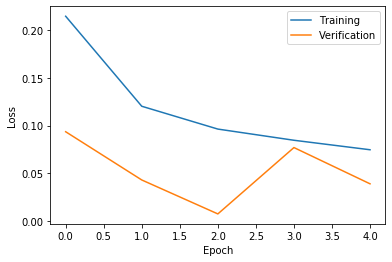

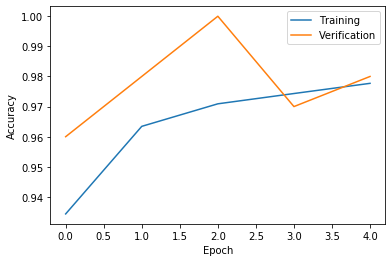

In [33]:
##############################################
# Modeling
##############################################
import tensorflow as tf2
from tensorflow.keras import layers, models

class _ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

        
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        super().__init__()
        self.hidden = layers.Dense(Nh)
        self.last = layers.Dense(Nout)
        
    def call(self, x):        
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        # Connect network elements
        #x = layers.Input(shape=(Nin,))
        h = relu(self.hidden(x))
        y = softmax(self.last(h))
        return y 
        
        
##############################################
# Data
##############################################
import numpy as np
from tensorflow.keras import datasets  # mnist
from tensorflow.keras import utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


##############################################
# Main
##############################################
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class

model = ANN_models_class(Nin, Nh, Nout)
# model.build(input_shape=[None,Nin])

(X_train, Y_train), (X_test, Y_test) = Data_func()

train_ds = tf2.data.Dataset.from_tensor_slices(
    (X_train, Y_train)).shuffle(10000).batch(100)
test_ds = tf2.data.Dataset.from_tensor_slices(
    (X_test, Y_test)).batch(100)

train_loss = tf2.keras.metrics.Mean(name='train_loss')
train_accuracy = tf2.keras.metrics.CategoricalAccuracy(name='train_accuracy')
test_loss = tf2.keras.metrics.Mean(name='test_loss')
test_accuracy = tf2.keras.metrics.CategoricalAccuracy(name='test_accuracy')


class History:
    def __init__(self):
        self.history = {'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}
        
history = History()

@tf2.function
def ep_train(xx, yy):
    with tf2.GradientTape() as tape:
        yp = model(xx)
        loss = Loss_object(yy, yp)
    gradients = tape.gradient(loss, model.trainable_variables)
    Optimizer.apply_gradients(zip(gradients, model.trainable_variables))       
    train_loss(loss)
    train_accuracy(yy, yp)

@tf2.function
def ep_test(xx, yy):
    yp = model(xx)
    t_loss = Loss_object(yy, yp)
    test_loss(t_loss)
    test_accuracy(yy, yp)        

Optimizer = tf2.keras.optimizers.Adam(learning_rate = 0.01)
Loss_object = tf2.keras.losses.CategoricalCrossentropy()
for epoch in range(5):
    for xx, yy in train_ds:
        ep_train(xx, yy)

    for images, labels in test_ds:
        ep_test(xx, yy)
        
    history.history['accuracy'].append(train_accuracy.result())
    history.history['loss'].append(train_loss.result())
    history.history['val_accuracy'].append(test_accuracy.result())
    history.history['val_loss'].append(test_loss.result())
    
    template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Test Loss: {:.2f}, Test Accuracy: {:.2f}'
    print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

    # Reset the metrics for the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
############################################
# Training
##############################################
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()